Developer: John Pan

This observes the cost of healthcare for a sample of the population given smoking habits, age, sex, bmi, and region. The data features observations of statistical informaton and regression analysis of the dataset.

The goal is to find the best estimator of insurance charges using machine learning algorithms.

In [1]:
# Lodaing the necessary Libraries.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")


In [2]:
#read data
os.chdir(r'H:\US Health Insurance database')

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [8]:
print(f'There are {data.shape[0]} rows in the data.')

There are 1338 rows in the data.


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
# Let's check out individual columns:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# Transform the Index object to a series, and grouping by data types:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [11]:
# let's create a dictionary containing various datatypes (Integer, Float and object) and the columns that have this datatype:
dt = {k.name: v for k, v in g.items()}
# Display the columns by different datatypes:
attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

,Attr 1,Attr 2,Attr 3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


In [12]:
# Unique values for 'children':
sorted(data['children'].unique())

[0, 1, 2, 3, 4, 5]

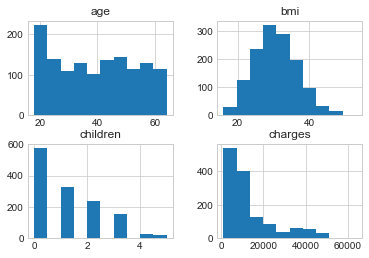

In [14]:
hist = data.hist()

In [35]:
from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

data = data.apply(LabelEncoder().fit_transform)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


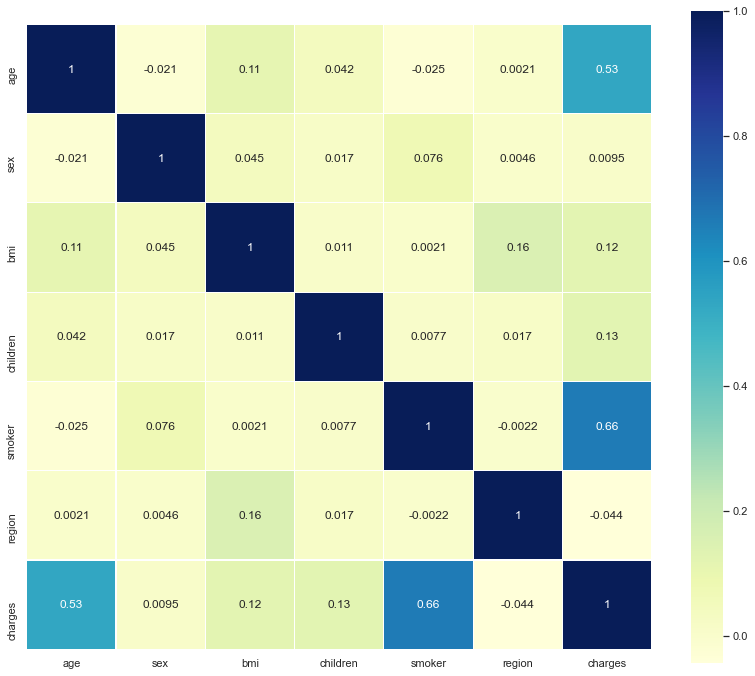

In [36]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(data.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

Seems like age and smoking weigh the most when looking at the charges row (or column). We expect the weights of these two to be higher than the rest.

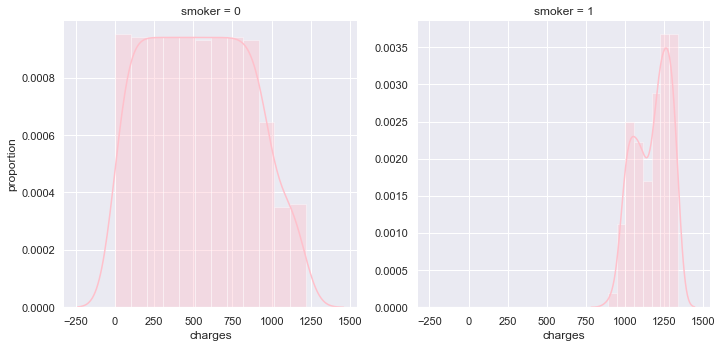

In [41]:
g = sns.FacetGrid(data, col="smoker",  size= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'pink');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

No surprise that smokers pay more for healtcare.

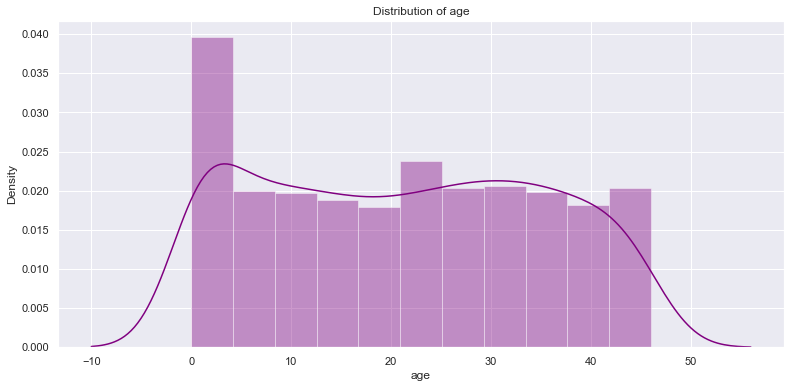

In [42]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'purple')

Judging by the party life at UVa, we can see why so many young adults even seek medical care.

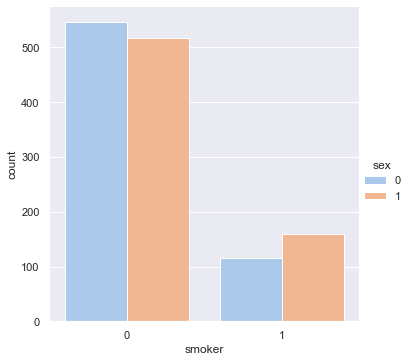

In [43]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = data , palette='pastel');
plt.show()

Luckily, most of population understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male.

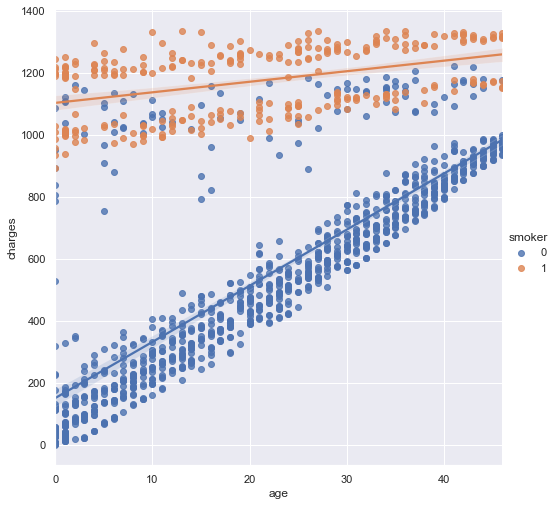

In [45]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data,  size = 7);
ax.set_title('Smokers and non-smokers');
plt.show()

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

Now let's study the 5-point summary and distribution of the numerical attributes: Age, BMI and Charges.

The Density plot gives an intuitive understanding of the underlying distribution of the attribute.
The Boxplot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels (quantiles) of variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
The cumulative frequency also corresponds to the density distribution, and indicates the central tendency of the data.

In [51]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [52]:
# Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:

def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))
    


    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    

    
    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')   

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


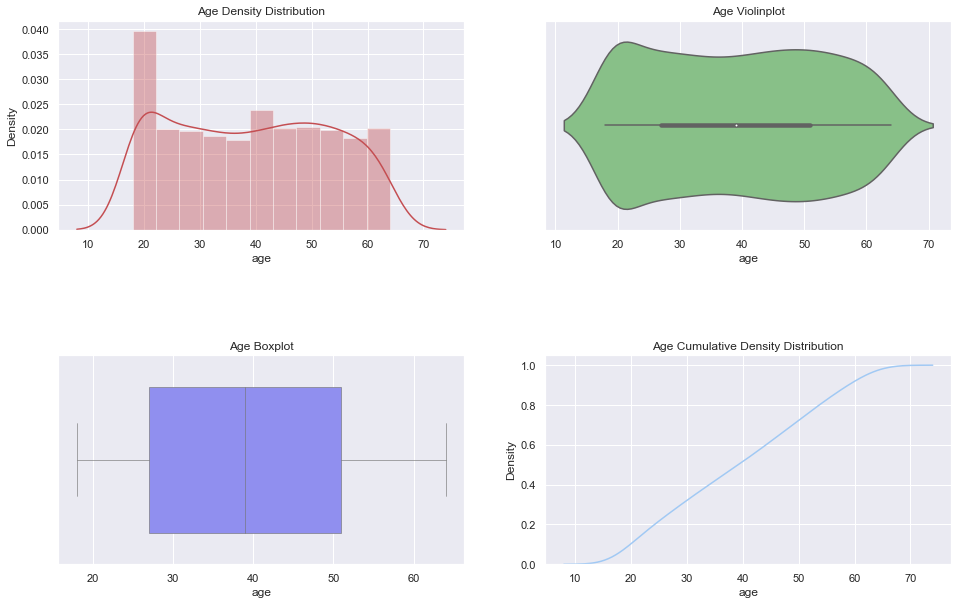

In [53]:
#Age distribution
summary('age')

Observations:
The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age being 18 and highest being 64.
There are no outlier values in the Age distribution in the data.

In [54]:
# How many of the insured have the age of 64?  
df = data[data['age'] == data['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


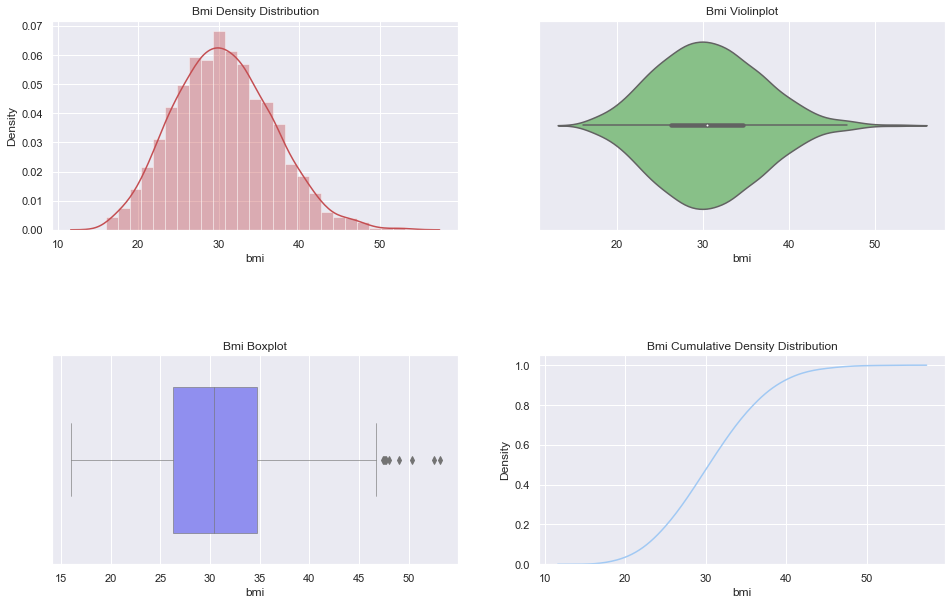

In [55]:
#BMI Distribution:
summary('bmi')

Mean Bmi = 30.663396860986538
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.

In [56]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [57]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

Observations:
The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
There are a total of 9 outlier values in the BMI distribution, all in the higher side. The highest BMI observed is 53.13.
The person with the highest BMI (least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium than the mean, but significantly more than the median charges. This is in line with our basic understanding of underwriting rules.

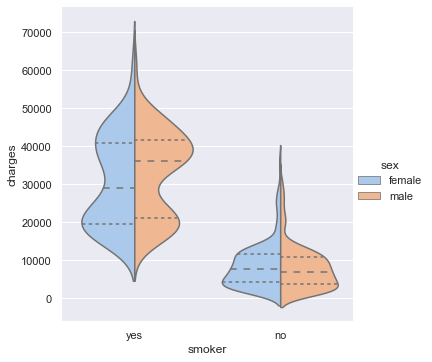

In [61]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data);

In [62]:
data.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

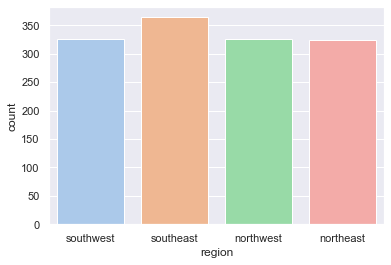

In [63]:
#Region
sns.countplot(x = 'region', data = data)

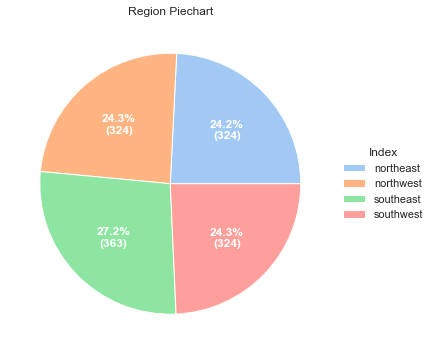

In [64]:
pie_chart('region')

<AxesSubplot:xlabel='children', ylabel='count'>

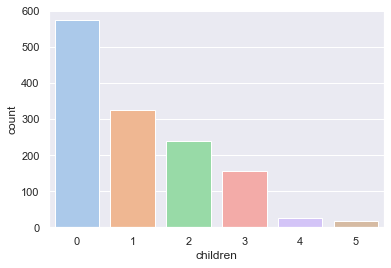

In [65]:
#Number of children
sns.countplot(x = 'children', data = data)

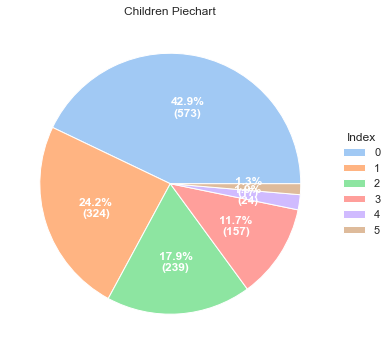

In [66]:
pie_chart('children')

In [67]:
data.groupby(['children']).agg('count')['age']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

In the dataset, approximately 85% (1138 / 1338) of the insured have less than 3 children.

Pairplot:
Let's plot pairwise relationships in our dataset through a pairplot. In order to show all columns in our pairplot, first let's convert all categorical attributes to their category codes. First we set the datatypes of all the categorical variables as category:

In [68]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes 

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [69]:
type(data.dtypes)

pandas.core.series.Series

In [70]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [71]:
# Finally, we transform the original columns by replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


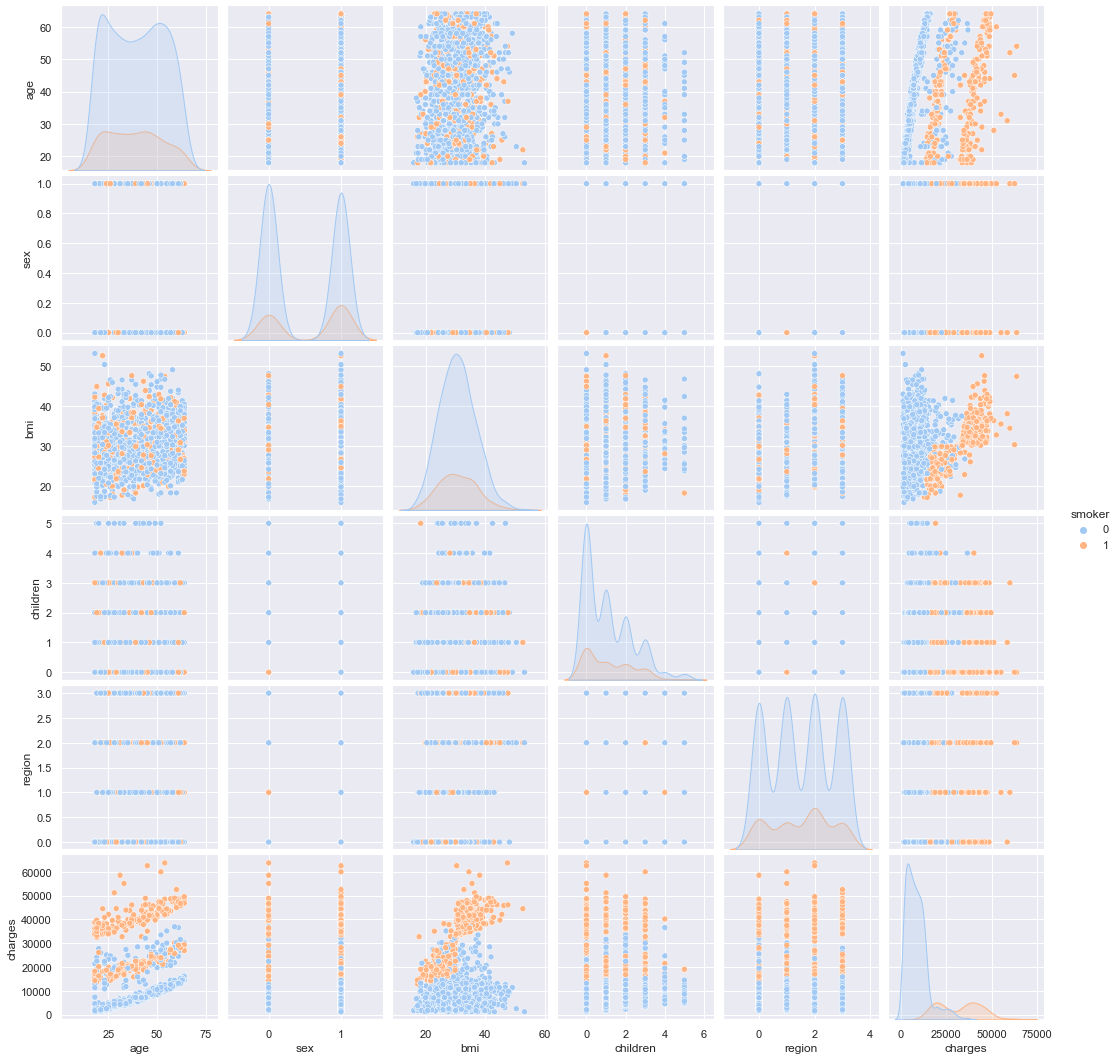

In [72]:
# Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(data, hue  = 'smoker')

##### Hypothesis Testing:

A Statistical Hypothesis Test is a method of statistical inference which is used in making decisions using sample data. Here we attempt to answer a few questions based on the nature of distribution and relationships between various attributes in our dataset through Hypothesis Tests. We follow the following methodology:

Formulate the null hypothesis  H0  and the alternative hypothesis  HA 
Select an appropriate statistical test and the corresponding test statistic
Choose level of significance α (generally taken as 0.05)
Collect data and calculate the value of test statistic
Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic
Compare the probability associated with the test statistic with level of significance specified

##### Do charges of people who smoke differ significantly from the people who don't?

State the null and alternative hypothesis
H0 :  μs  =  μn 
HA :  μs  !=  μn 
Where:

μs  = Mean Charge of all smokers in our data
μn  = Mean Charge of all non - smokers in our data

Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.

Choose level of significance α
We select α = 0.05

In [73]:
#Collect data and calculate the value of test statistic:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 1064
Variance in charges of smokers: 35891656.00316425
Number of non - smokers: 274
Variance in charges of non - smokers: 132721153.13625304


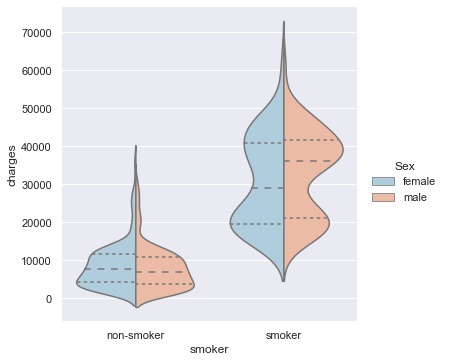

In [74]:
#Visualizing the collected data:
g = sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="RdBu_r", data=data, legend_out = True);

xlabels = ['non-smoker', 'smoker']
g.set_xticklabels(xlabels)

new_title = 'Sex'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['female', 'male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [79]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [80]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 5.88946444671698e-103


Compare the probability associated with the test statistic with level of significance specified

At 5% significance level, α = 0.05

In [82]:
p_value > 0.05

False

 ##### Conclusion:
 We Reject the Null Hypothesis and state that At 5% significance level, the mean charges of smokers and non - smokers are not equal.
 
 Hence, charges of people who smoke indeed differ significantly from the people who don't.

##### Does BMI of males differ significantly from that of females?
State the null and alternative hypothesis

H0 : μm = μf
HA :  μm  !=  μf

Where:

μm  = Mean BMI of all male insured in our data
μf  = Mean BMI of all female insured in our data

Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.

Choose level of significance α
We select α = 0.05

Collect data and calculate the value of test statistic



In [83]:
males = data[data['sex'] == 1]
females = data[data['sex'] == 0]
bmi_males = males['bmi']
bmi_females = females['bmi']

print(f'Number of males: {males.shape[0]}')
print(f'Variance in BMI of males: {np.var(bmi_males)}')
print(f'Number of females: {females.shape[0]}')
print(f'Variance in BMI of females: {np.var(bmi_females)}')

Number of males: 676
Variance in BMI of males: 37.6491607363954
Number of females: 662
Variance in BMI of females: 36.49917703379856


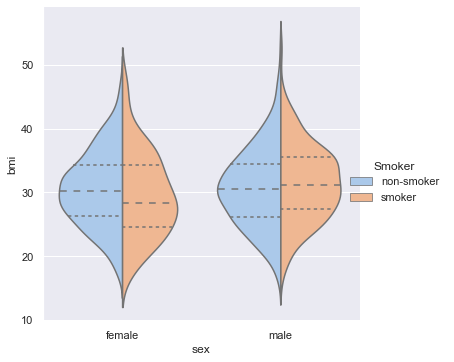

In [84]:
#Visualizing the collected data:
g = sns.catplot(x="sex", y="bmi", hue="smoker",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data, legend_out = True);

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)

new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [85]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_males, bmi_females, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [86]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08992430667834876


 Compare the probability associated with the test statistic with level of significance specified

At 5% significance level, α = 0.05

In [88]:
p_value > 0.05

True

##### Conclusion:
We Fail to Reject the Null Hypothesis and state that At 5% significance level, the mean BMI of insured males and females are equal.

Hence, BMI of males do not differ significantly from that of females in our data.

##### Is the proportion of smokers significantly different in different genders?
sex' and 'smoker' are two categorical variables.
We want to see if the proportion of smokers in the female population is significantly less than it is in the male population.

State the null and alternative hypothesis

H0 :  pm  =  pf
HA :  pm  !=  pf

Where:

pm  = Male Smokers / Total Male insured
pf  = Female Smokers / Total Female insured

Select an appropriate statistical test and the corresponding test statistic
We select a proportion Z - test as our statistical test and the corresponding Z statistic as our test statistic.

Choose level of significance α
We select α = 0.05

Collect data and calculate the value of test statistic


In [89]:
n_females = data['sex'].value_counts()[0] # number of females in the data
n_males = data['sex'].value_counts()[1] # number of females in the data

female_smokers = data[data['sex'] == 0].smoker.value_counts()[1] # number of female smokers
male_smokers = data[data['sex'] == 1].smoker.value_counts()[1] # number of male smokers

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 17.37%, 23.52% respectively.


[Text(0, 0, 'female'), Text(0, 1, 'male')]

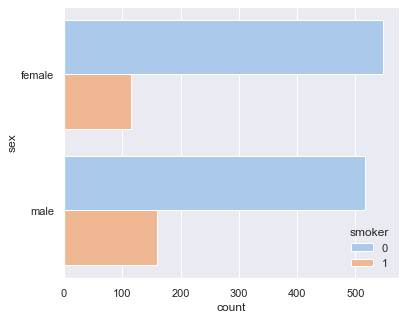

In [90]:
# Visualization of the collected data:
plt.figure(figsize=(6,5))
chart = sns.countplot(y = 'sex', hue = 'smoker', data = data)
chart.set_yticklabels(['female', 'male'])

In [91]:
# The proportions are different, but are they statistically significant?
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: -2.7867402154855503
p_value: 0.005324114164320532


Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [92]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {pval} the difference is not significant. We fail to reject the Null Hypothesis')

With a p-value of 0.005324114164320532 the difference is significant. We reject the Null Hypothesis.


#####  Conclusion:
We Reject the Null Hypothesis and state that At 5% significance level, the porportion of smokers in insured males and females are equal.

Hence, proportion of smokers are significantly different in different genders.

##### Is the distribution of bmi across women with no children, one child and two children, the same?

Analysis of variance (ANOVA)
ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means.

Assumptions of ANOVA
All populations involved follow a normal distribution
All populations have the same variance
The samples are randomly selected and independent of one another

State the null and alternative hypothesis
H0 :  μ0  =  μ1  =  μ2
HA : Atleast one of the means are different.

Where:

μi  = Population mean of BMI of women having 0, 1 and 2 children.

Select an appropriate statistical test and the corresponding test statistic
We select one way ANOVA as our test and mean BMI of the different groups as our test statistic.

Choose level of significance α
We select α = 0.05.

Collect data and calculate the value of test statistic
Here we have 3 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [93]:
df = data[data['children'] <= 2]
female = df[df['sex'] == 0]
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
9,60,0,25.84,0,0,1,28923.13692
11,62,0,26.29,0,1,2,27808.72510


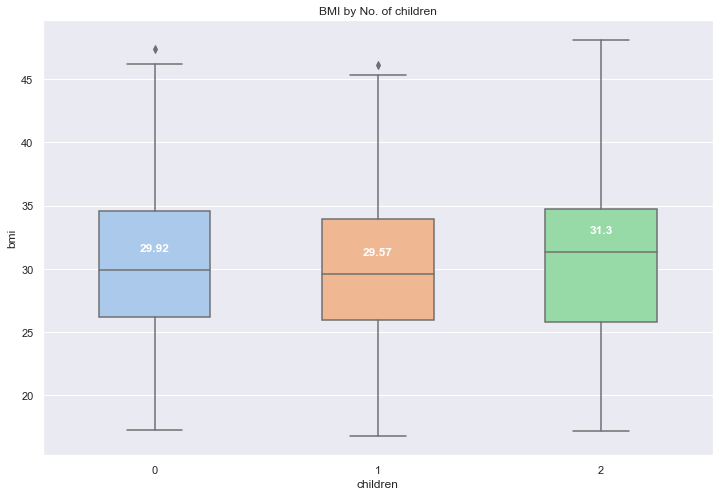

In [94]:
# Visualizing the collected data:
fig = plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = female, width = 0.5)

medians = female.groupby(['children'])['bmi'].median().round(2)
vertical_offset = female['bmi'].median() * 0.05 # offset from median for display

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')


plt.title('BMI by No. of children')
plt.show()

Calculate p value using ANOVA table
statsmodels.formula.api.ols creates a model from a formula and dataframe
statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models.

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


##### Conclusion:
We Fail to Reject the null hypothesis that for BMI for 3 groups of women having no, one or two children respectively, mean BMI of all groups are equal.

Hence, the distribution of BMI across women with no children, one child and two children are the same.

Determine which mean(s) is / are different
An ANOVA test will test that at least one mean is different.
We have falied to reject the null hypothesis but do not know which mean(s) is / are different. We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female['bmi'], female['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


#### Machine Learning
First step is to apply get dummies which works like this:
The pandas.get_dummies converts the vectors of categorical features into a vector-matrix multiplication with a boolean matrix of ones and zeros. This will be more useful since our regressor will treat the inputs as numbers instead of integers.


In [97]:
df=data
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [98]:
y = df['charges']
X = df.drop(columns=['charges'])

Since no testing data is provided, we will split the given dataset into training and testing sets.

In [99]:
from sklearn.model_selection import train_test_split


# use 10% of dataset as testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

##### Logistic Regression 

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 3.7005e+07, MSE test data: 3.2403e+07
RMSE train data: 6083.2, RMSE test data: 6083.2
R2 train data: 0.74907, R2 test data: 0.76512


In [101]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.75 (+/- 0.076)


##### Polynomial

In [102]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.1, random_state=42)

In [103]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 2.3045e+07, MSE test data: 20507572.959475845
RMSE train data: 4800.6, RMSE test data: 4800.6
R2 train data: 0.84373, R2 test data: 0.85135


In [104]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2)) 

Accuracy: 0.78 (+/- 0.11)


Now we have a better variance score using polynomial relationships.

###### Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.4605e+06, MSE test data: 2.1896e+07
RMSE train data: 1860.2, RMSE test data: 1860.2
R2 train data: 0.97653, R2 test data: 0.84128


In [106]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.092)


##### BayesianRidge

In [108]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.4919e+07, MSE test data: 2.029e+07
RMSE train data: 4991.9, RMSE test data: 4991.9
R2 train data: 0.83103, R2 test data: 0.85292


In [109]:
br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.069)


This is a decent prediction, we can safely assume that the Random Forest wins with a variance score of 97% against training data, and 84% against data it has never seen before. It also has the lowest root MSE value.


With cross-validation, however, Bayesian regression gets the same average as the Random Forest but with a smaller standard deviation using 7 folds.